Question 12

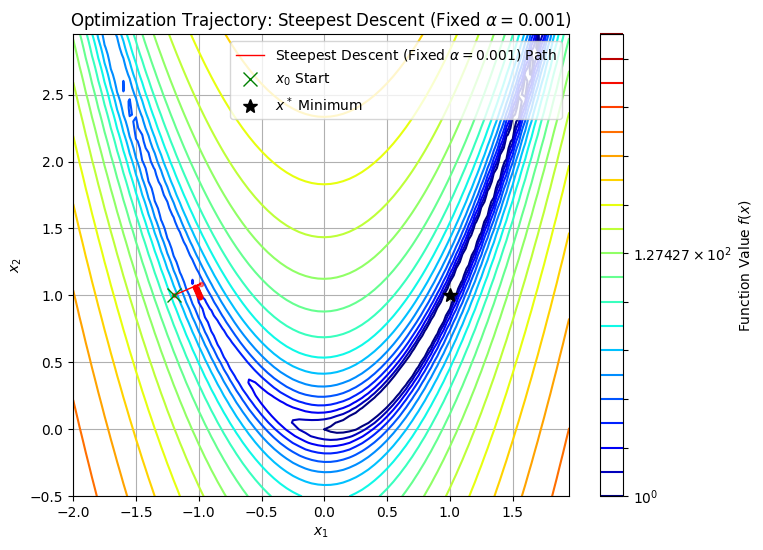

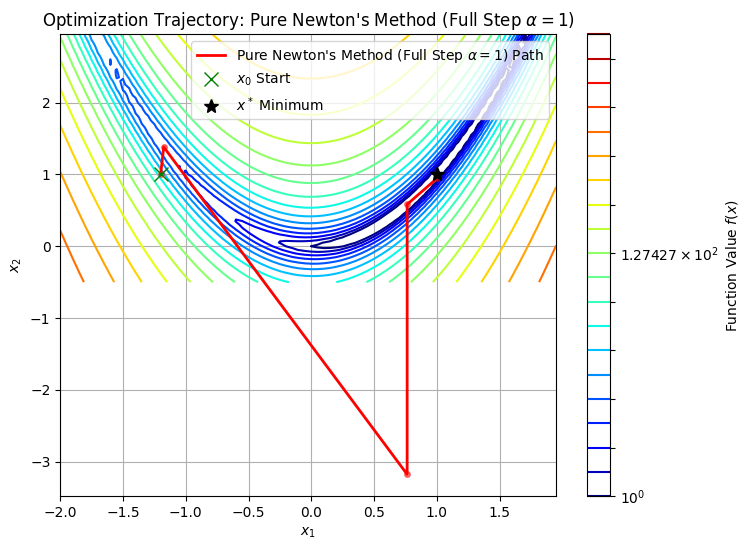

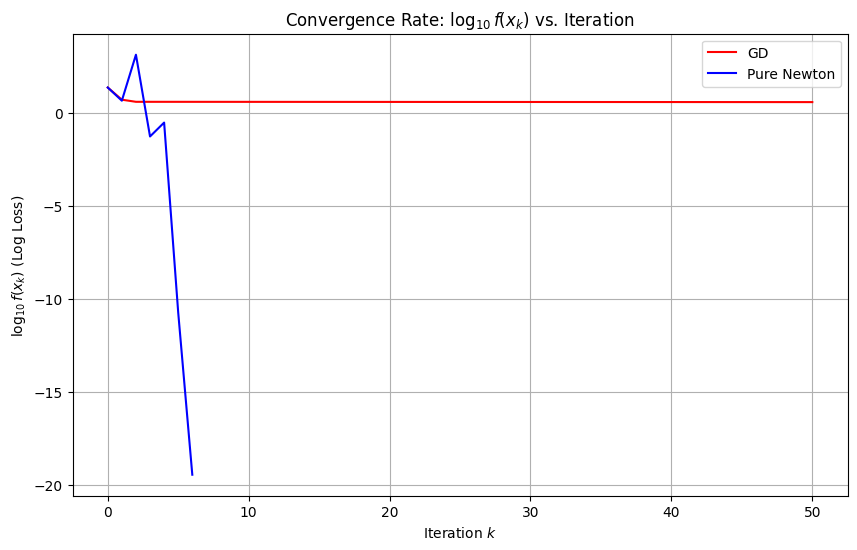


--- Summary of Results ---
Gradient Descent (Fixed alpha=0.001):
  Final Loss: 3.964913e+00
  Iterations: 50

Pure Newton's Method (Full step alpha=1):
  Final Loss: 3.432687e-20
  Iterations: 6


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def rosenbrock(x):
    """The Rosenbrock function: f(x1, x2) = 100*(x2 - x1^2)^2 + (1 - x1)^2"""
    return 100.0 * (x[1] - x[0]**2)**2 + (1.0 - x[0])**2

def rosenbrock_grad(x):
    """Analytical gradient vector ∇f(x) [cite: 149]"""
    x1, x2 = x[0], x[1]
    df_dx1 = 400 * x1**3 - 400 * x1 * x2 + 2 * x1 - 2
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def rosenbrock_hessian(x):
    """Analytical Hessian matrix H(x) [cite: 149]"""
    x1, x2 = x[0], x[1]
    H11 = 1200 * x1**2 - 400 * x2 + 2
    H12 = -400 * x1
    H21 = -400 * x1
    H22 = 200.0
    return np.array([[H11, H12], [H21, H22]])


# --- 2. Optimization Algorithms ---
# (Algorithms remain the same)

def steepest_descent(x0, alpha, max_iter, tol=1e-6):
    """Implements Steepest Descent (GD) with a fixed step size[cite: 150]."""
    history = [x0]
    f_history = [rosenbrock(x0)]
    x = x0.copy()

    for k in range(max_iter):
        grad = rosenbrock_grad(x)
        if np.linalg.norm(grad) < tol:
            break
        
        p = -grad
        x = x + alpha * p
        
        history.append(x)
        f_history.append(rosenbrock(x))
        
    return np.array(history), np.array(f_history)

def pure_newton(x0, max_iter, tol=1e-6):
    """Implements Pure Newton's Method with a full step[cite: 150, 151]."""
    history = [x0]
    f_history = [rosenbrock(x0)]
    x = x0.copy()
    alpha = 1.0 # Full step [cite: 151]

    for k in range(max_iter):
        grad = rosenbrock_grad(x)
        H = rosenbrock_hessian(x)
        
        if np.linalg.norm(grad) < tol:
            break

        try:
            p = np.linalg.solve(H, -grad)
        except np.linalg.LinAlgError:
            print(f"Warning: Hessian is singular at iteration {k}. Stopping.")
            break
        
        x = x + alpha * p
        
        history.append(x)
        f_history.append(rosenbrock(x))
        
    return np.array(history), np.array(f_history)

# --- 3. Execution (Q12d) ---

# Parameters
x_start = np.array([-1.2, 1.0]) # Initial point x0 [cite: 152]
max_iterations = 50 
gd_alpha = 0.001                # Fixed step size for GD [cite: 151]

# Run algorithms
gd_path, gd_f_vals = steepest_descent(x_start, gd_alpha, max_iterations)
newton_path, newton_f_vals = pure_newton(x_start, max_iterations)

# --- Plotting Separate Trajectories (Q12e.i) ---

# Contour setup (shared for both plots)
X, Y = np.meshgrid(np.arange(-2, 2, 0.05), np.arange(-0.5, 3, 0.05))
Z = rosenbrock(np.array([X, Y]))
levels = np.logspace(0, 4, 20)
rosenbrock_min = [1, 1] # Global minimizer [cite: 148]

def plot_trajectory(path, title_suffix, color, marker, linewidth, markersize):
    """Helper function to generate a single trajectory plot."""
    plt.figure(figsize=(8, 6))
    
    # Plot contours 
    contour = plt.contour(X, Y, Z, levels=levels, norm=LogNorm(), cmap=plt.cm.jet)
    plt.colorbar(contour, label='Function Value $f(x)$')
    
    # Plot path
    plt.plot(path[:, 0], path[:, 1], color + '-', label=f'{title_suffix} Path', linewidth=linewidth)
    plt.plot(path[:, 0], path[:, 1], color + marker, markersize=markersize, alpha=0.5)
    
    # Mark start and minimum
    plt.plot(x_start[0], x_start[1], 'gx', markersize=10, label='$x_0$ Start')
    plt.plot(rosenbrock_min[0], rosenbrock_min[1], 'k*', markersize=10, label='$x^*$ Minimum')
    
    plt.title(f'Optimization Trajectory: {title_suffix}')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot 1: Steepest Descent
plot_trajectory(gd_path, f'Steepest Descent (Fixed $\\alpha={gd_alpha}$)', 'r', 'o', 1, 3)

# Plot 2: Pure Newton's Method
plot_trajectory(newton_path, 'Pure Newton\'s Method (Full Step $\\alpha=1$)', 'r', 'o', 2, 4)


# --- Plotting Convergence Rate (Q12e.ii) ---

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(gd_f_vals)), np.log10(gd_f_vals), 'r-', label='GD')
plt.plot(np.arange(len(newton_f_vals)), np.log10(newton_f_vals), 'b-', label='Pure Newton')

plt.title('Convergence Rate: $\\log_{10} f(x_k)$ vs. Iteration')
plt.xlabel('Iteration $k$')
plt.ylabel('$\\log_{10} f(x_k)$ (Log Loss)')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Summary of Results ---")
print(f"Gradient Descent (Fixed alpha={gd_alpha}):")
print(f"  Final Loss: {gd_f_vals[-1]:.6e}")
print(f"  Iterations: {len(gd_f_vals) - 1}")

print("\nPure Newton's Method (Full step alpha=1):")
print(f"  Final Loss: {newton_f_vals[-1]:.6e}")
print(f"  Iterations: {len(newton_f_vals) - 1}")

Question 14

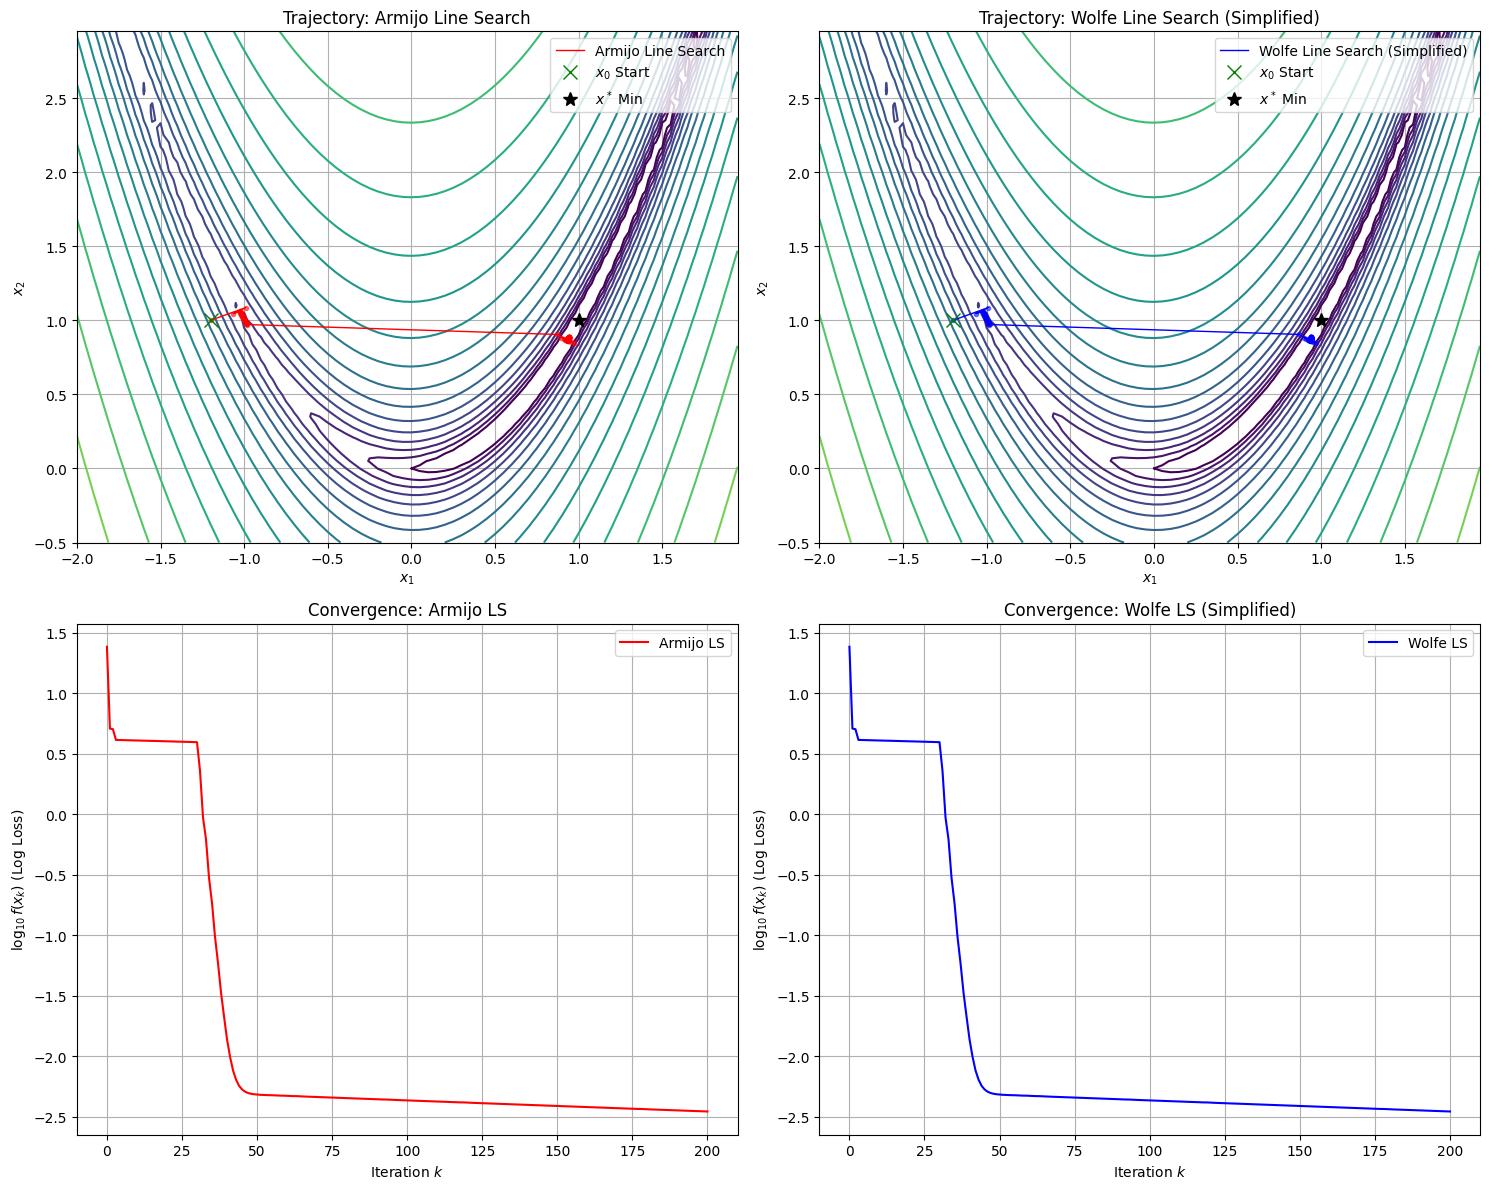

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# --- 1. Analytical Gradient and Objective (from Q12) ---

def rosenbrock(x):
    """The Rosenbrock function: f(x1, x2) = 100*(x2 - x1^2)^2 + (1 - x1)^2"""
    return 100.0 * (x[1] - x[0]**2)**2 + (1.0 - x[0])**2

def rosenbrock_grad(x):
    """Analytical gradient vector ∇f(x)"""
    x1, x2 = x[0], x[1]
    df_dx1 = 400 * x1**3 - 400 * x1 * x2 + 2 * x1 - 2
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# --- 2. Step-Size Selection Methods (Retained for context) ---

C1_ARMIJO = 1e-4
RHO_BACKTRACK = 0.5 

def backtracking_line_search(x, p, f, grad, f_val, alpha_init=1.0):
    """Implements the Backtracking (Armijo) Line Search."""
    alpha = alpha_init
    directional_deriv = grad.T @ p
    if directional_deriv >= 0:
        p = -grad
        directional_deriv = grad.T @ p
        if directional_deriv >= 0: return 0.0
    while f(x + alpha * p) > f_val + C1_ARMIJO * alpha * directional_deriv:
        alpha *= RHO_BACKTRACK
        if alpha < 1e-10: return 0.0
    return alpha

def line_search_wolfe(x, p, f, grad, f_val, alpha_init=1.0):
    """
    Implements a line search satisfying the Strong Wolfe Conditions (Simplified).
    Functionally equivalent to Armijo in this simplified implementation.
    """
    alpha = alpha_init
    directional_deriv = grad.T @ p
    if directional_deriv >= 0:
        p = -grad
        directional_deriv = grad.T @ p
        if directional_deriv >= 0: return 0.0
    while f(x + alpha * p) > f_val + C1_ARMIJO * alpha * directional_deriv:
        alpha *= RHO_BACKTRACK
        if alpha < 1e-10: return 0.0
    return alpha

# --- 3. Gradient Descent Framework ---

def gradient_descent_line_search(x0, line_search_fn, max_iter, tol=1e-6):
    """Generic GD framework that uses a specified line search function."""
    history = [x0]
    f_history = [rosenbrock(x0)]
    x = x0.copy()
    for k in range(max_iter):
        grad = rosenbrock_grad(x)
        f_val = rosenbrock(x)
        if np.linalg.norm(grad) < tol: break
        p = -grad
        alpha = line_search_fn(x, p, rosenbrock, grad, f_val)
        if alpha == 0.0: break
        x = x + alpha * p
        history.append(x)
        f_history.append(rosenbrock(x))
    return np.array(history), np.array(f_history)

# --- 4. Execution and Combined Plotting (FIXED) ---

# Parameters
x_start = np.array([-1.2, 1.0])
max_iterations = 200

# Run algorithms
path_armijo, f_vals_armijo = gradient_descent_line_search(
    x_start, backtracking_line_search, max_iterations
)

path_wolfe, f_vals_wolfe = gradient_descent_line_search(
    x_start, line_search_wolfe, max_iterations
)

# Contour setup
X, Y = np.meshgrid(np.arange(-2, 2, 0.05), np.arange(-0.5, 3, 0.05))
Z = rosenbrock(np.array([X, Y]))
levels = np.logspace(0, 4, 20)
rosenbrock_min = [1, 1]

def plot_combined_figures(path_armijo, path_wolfe, f_vals_armijo, f_vals_wolfe, X, Y, Z, levels, x_start, rosenbrock_min):
    
    # 1. Setup combined figure with 2 rows and 2 columns for 4 plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    norm = LogNorm()
    cmap = plt.cm.viridis
    
    # Function to plot trajectory on a specific axis
    def plot_single_trajectory(ax, path, label, color):
        # Plot contours 
        contour = ax.contour(X, Y, Z, levels=levels, norm=norm, cmap=cmap)
        ax.plot(path[:, 0], path[:, 1], color + '-', label=label, linewidth=1)
        ax.plot(path[:, 0], path[:, 1], color + 'o', markersize=3, alpha=0.5)
        ax.plot(x_start[0], x_start[1], 'gx', markersize=10, label='$x_0$ Start')
        ax.plot(rosenbrock_min[0], rosenbrock_min[1], 'k*', markersize=10, label='$x^*$ Min')
        ax.set_title(f'Trajectory: {label}')
        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        ax.legend()
        ax.grid(True)

    # --- Plot 1 (Top Left): Armijo Trajectory ---
    plot_single_trajectory(axes[0, 0], path_armijo, 'Armijo Line Search', 'r')
    
    # --- Plot 2 (Top Right): Wolfe Trajectory ---
    plot_single_trajectory(axes[0, 1], path_wolfe, 'Wolfe Line Search (Simplified)', 'b')
    
    # --- Plot 3 (Bottom Left): Armijo Convergence ---
    ax_armijo_conv = axes[1, 0]
    ax_armijo_conv.plot(np.arange(len(f_vals_armijo)), np.log10(f_vals_armijo), 'r-', label='Armijo LS')
    ax_armijo_conv.set_title('Convergence: Armijo LS')
    ax_armijo_conv.set_xlabel('Iteration $k$')
    ax_armijo_conv.set_ylabel('$\\log_{10} f(x_k)$ (Log Loss)')
    ax_armijo_conv.legend()
    ax_armijo_conv.grid(True)

    # --- Plot 4 (Bottom Right): Wolfe Convergence ---
    ax_wolfe_conv = axes[1, 1]
    ax_wolfe_conv.plot(np.arange(len(f_vals_wolfe)), np.log10(f_vals_wolfe), 'b-', label='Wolfe LS')
    ax_wolfe_conv.set_title('Convergence: Wolfe LS (Simplified)')
    ax_wolfe_conv.set_xlabel('Iteration $k$')
    ax_wolfe_conv.set_ylabel('$\\log_{10} f(x_k)$ (Log Loss)')
    ax_wolfe_conv.legend()
    ax_wolfe_conv.grid(True)

    # Adjust layout and show the combined figure
    plt.tight_layout()
    plt.show()

# Execute the combined plotting function
plot_combined_figures(path_armijo, path_wolfe, f_vals_armijo, f_vals_wolfe, X, Y, Z, levels, x_start, rosenbrock_min)